In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("final_cleaned_salary_data.csv")

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,max_salary,average_salary,company_txt,job_state,same_state,age,python,spark,aws,excel
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,90,85.0,KnowBe4\n,FL,1,10,1,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,97,76.5,PNNL\n,WA,1,55,1,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [7]:
# Simplifing the job titles in various categories
df['job_simp'] = df["Job Title"].apply(title_simplifier)
df['seniority'] = df["Job Title"].apply(seniority)

In [8]:
# Los Angeles is present in the job state col instead of CA
df['job_state']=  df['job_state'].apply(lambda x: x.strip() if x.lower() != 'los angeles' else 'CA')

In [9]:
df["desc_length"] = df["Job Description"].apply(lambda x: len(x))

In [10]:
df["desc_length"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_length, Length: 742, dtype: int64

In [11]:
df["num_comp"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x!= -1 else na)

In [12]:
df["Competitors"].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
NBCUniversal, Comcast, Netflix                                                                    1
MetLife, Northwestern Mutual, Prudential                                                          1
IDEO, Gongos, Inc., Ipsos                                                                         1
MedStar Health, University of Maryland Medical Center, LifeBridge Health                          1


In [13]:
df.hourly

0      0
1      0
2      0
3      0
4      0
      ..
737    0
738    0
739    0
740    0
741    0
Name: hourly, Length: 742, dtype: int64

In [14]:
# Convert hourly wage to yearly wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1 )
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1 )

In [15]:
df[df.hourly ==1][["hourly","min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [16]:
df["company_txt"] = df["company_txt"].apply(lambda x: x.replace("\n", "").strip())

In [17]:
df["company_txt"].value_counts()

MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    11
Liberty Mutual Insurance          10
                                  ..
DatamanUSA, LLC                    1
Maximus Real Estate Partners       1
DRB Systems                        1
L&T Infotech                       1
Johns Hopkins Health Care          1
Name: company_txt, Length: 343, dtype: int64

In [18]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python,spark,aws,excel,desc_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.225067,0.237197,0.522911,3869.545822,1.673854
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.417908,0.425651,0.499812,1521.495868,0.918451
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,1.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,3731.000000,1.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


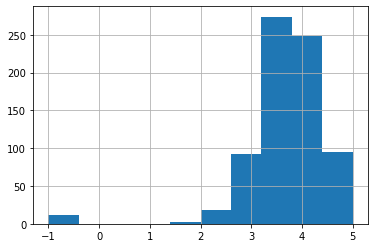

In [19]:
df.Rating.hist()

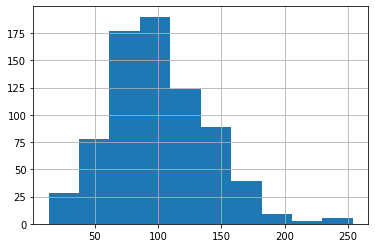

In [20]:
df.average_salary.hist()

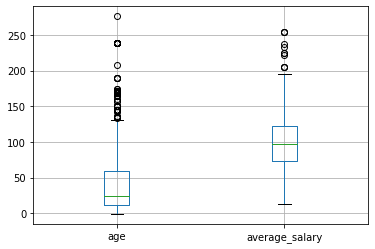

In [21]:
df.boxplot(column = ["age","average_salary"]);

In [22]:
df[['age', 'average_salary','Rating','desc_length']].corr()

,age,average_salary,Rating,desc_length
age,1.000000,0.019655,0.021655,0.163911
average_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_length,0.163911,0.078808,-0.012281,1.000000


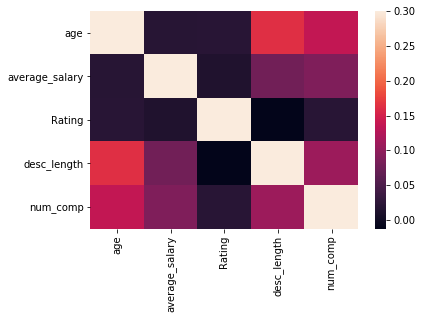

In [23]:
sns.heatmap(df[['age', 'average_salary','Rating','desc_length','num_comp']].corr(), vmax=0.3)

In [24]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [25]:
df_cat = df[['Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'python', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]
df_cat2 = df[['Location','Headquarters', 'company_txt']]

graph for Size: total = 9


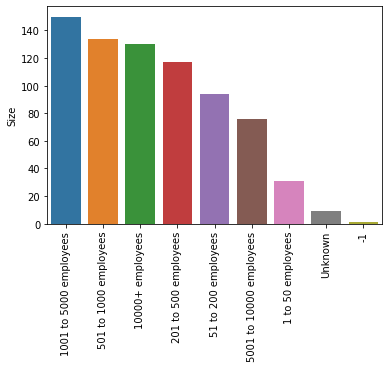

graph for Type of ownership: total = 11


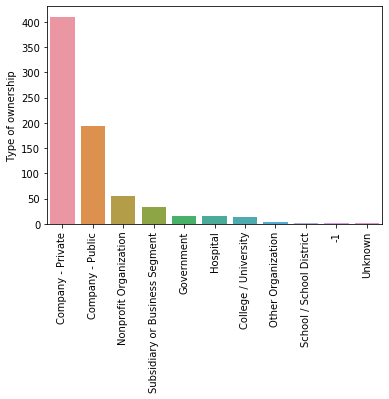

graph for Industry: total = 60


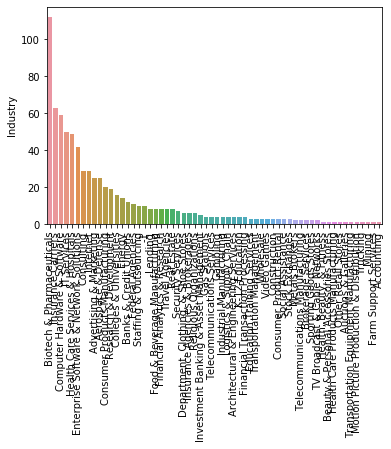

graph for Sector: total = 25


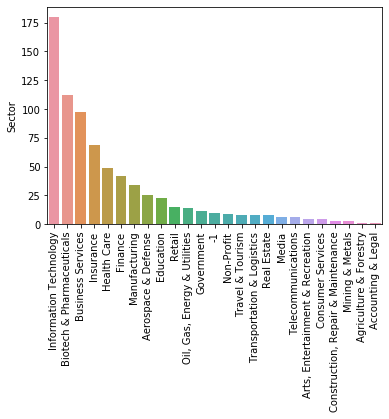

graph for Revenue: total = 14


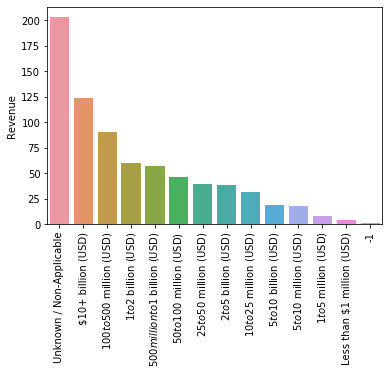

graph for job_state: total = 38


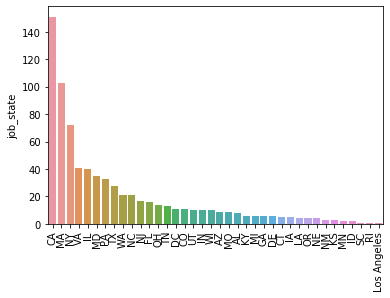

graph for same_state: total = 2


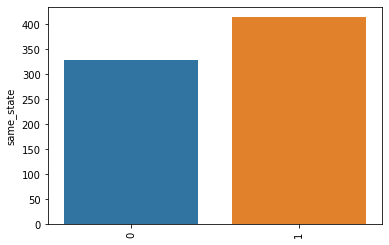

graph for python: total = 2


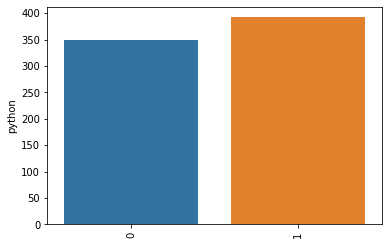

graph for spark: total = 2


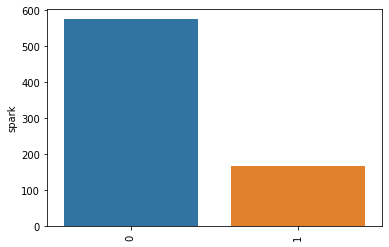

graph for aws: total = 2


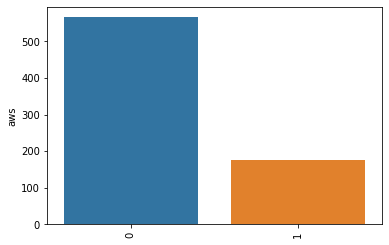

graph for excel: total = 2


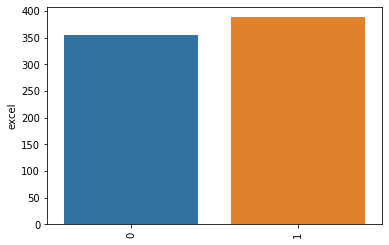

graph for job_simp: total = 7


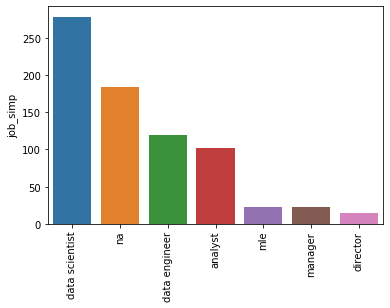

graph for seniority: total = 3


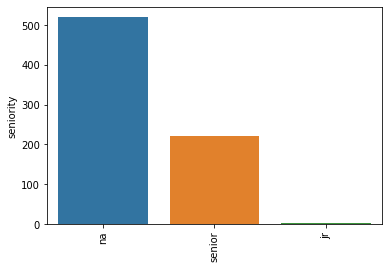

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


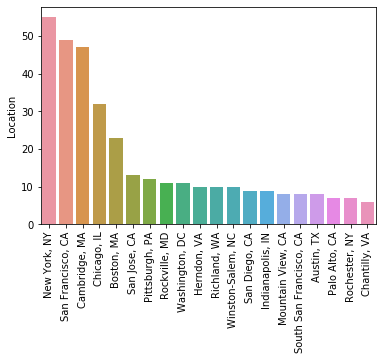

graph for Headquarters: total = 20


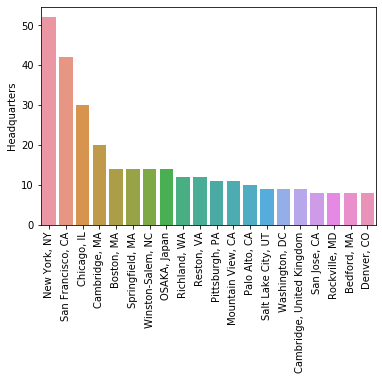

graph for company_txt: total = 20


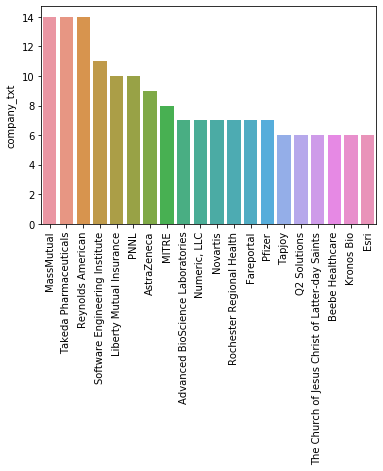

In [27]:
for i in df_cat2.columns:
    cat_num = df_cat2[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [28]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = ['job_simp', 'seniority'] , values = 'average_salary')

average_salary
job_simp       seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [30]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state','job_simp'] , values = 'average_salary').sort_values('job_state',ascending=False)

average_salary
job_state   job_simp                      
WI          na                   54.000000
            data scientist      113.500000
            analyst              58.833333
WA          na                   97.500000
            data scientist       99.764706
            analyst              54.500000
VA          na                   79.300000
            mle                  87.000000
            data scientist      108.416667
            data engineer        96.900000
            analyst              71.583333
UT          data engineer       100.333333
            analyst              54.750000
            data scientist      140.500000
TX          na                   41.285714
            data scientist      100.730769
            data engineer       113.062500
TN          data scientist       96.000000
            data engineer       100.950000
            analyst              13.500000
SC          na                   60.500000
RI          analyst             100.000000
PA          manager             109.666667
            data engineer        91.500000
            data scientist      113.333333
            analyst              62.750000
            mle                 120.500000
            na                   76.062500
OR          data scientist       98.500000
            data engineer        73.000000
OH          na                   91.166667
            data scientist      105.285714
            analyst              53.875000
NY          na                   81.583333
            mle                 125.000000
            data scientist      115.250000
            data engineer        86.375000
            analyst              65.607143
NM          data scientist       74.333333
NJ          data scientist      106.875000
            analyst              83.583333
            data engineer       112.000000
            manager             109.500000
            director            161.500000
            na                   82.500000
NE          na                   41.000000
NC          na                   90.916667
            data scientist      117.000000
            data engineer       104.250000
MO          na                   72.333333
            manager              40.500000
            data scientist      127.666667
            analyst              61.000000
MN          data engineer        95.000000
            analyst              76.000000
MI          data scientist      106.625000
            manager              87.500000
MD          na                   88.750000
            data scientist      109.115385
            data engineer       109.000000
            analyst              80.666667
MA          na                  107.478261
            manager              71.900000
            director            117.833333
            data scientist      113.750000
            data engineer       107.291667
            analyst              59.125000
Los Angeles data scientist      107.500000
LA          analyst              48.000000
            data engineer        70.500000
            na                   20.000000
KY          na                  103.500000
            data scientist       84.000000
KS          mle                  87.000000
IN          na                   69.000000
            data scientist       84.500000
            data engineer       114.500000
IL          analyst              66.500000
            na                   57.166667
            mle                 133.000000
            director            221.750000
            data scientist      117.233333
            data engineer        96.125000
ID          analyst              56.250000
IA          analyst              43.000000
            data engineer       102.833333
GA          data scientist       81.333333
            na                   80.000000
FL          data scientist       97.357143
            data engineer        91.833333
            analyst              47.500000
DE          na               

In [31]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state','job_simp'] , values = 'average_salary', aggfunc = 'count').sort_values('average_salary',ascending=False)

,,average_salary
job_state,job_simp,
CA,data scientist,67
NY,data scientist,40
MA,data scientist,30
VA,data scientist,18
WA,data scientist,17
IL,data scientist,15
TX,data scientist,13
MD,data scientist,13
FL,data scientist,7


In [32]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_length', 'num_comp'],
      dtype='object')

In [33]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided','python', 'spark', 'aws', 'excel','Type of ownership', 'num_comp', 'average_salary']]

In [34]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending =False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns= 'python', values = 'average_salary', aggfunc = 'count')

In [35]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

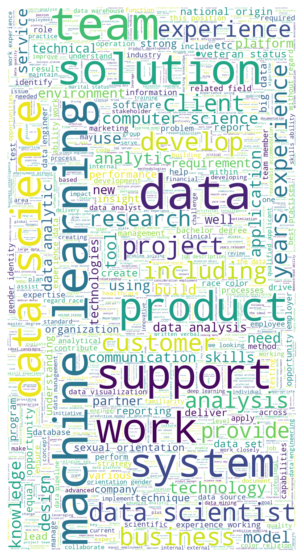

In [36]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df.to_csv("salary_eda_data.csv")